In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt

In [4]:
training_set = pd.read_csv("Salary_Data.csv")

x_train = training_set["YearsExperience"].values
y_train = training_set["Salary"].values

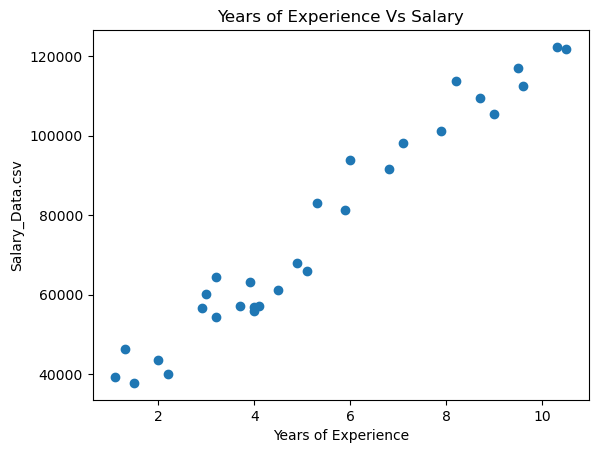

In [5]:
plt.scatter(x_train,y_train)
plt.xlabel("Years of Experience")
plt.ylabel("Salary_Data.csv")
plt.title("Years of Experience Vs Salary")
plt.show()

***The figure above clearly shows that salary increases with years of experience. This represents a simple linear relationship. Linear regression is a statistical method used to study the relationship between one dependent variable (e.g., salary) and one or more independent variables (e.g., years of experience). Using a linear regression model, we can predict values like salary based on years of experience when the relationship is linear.***

***The equation for linear regression is f(x) = y, where y = wx + b. To predict y (salary, in this case), we need to find the optimal values of w and b so that the model can learn the relationship between salary and years of experience and accurately predict salary based on years of experience.***

*To implement linear regression from scratch, we will need three functions.*
- **Cost Function:** *The Mean Squared Error.*
- **Gradient Function:** *To compute the derivatives of the cost function.* 
- **Gradient Descent Function:** *To update w and b over a specified number of iterations.*  

In [12]:
def cost_function(x, y, w, b):
    m = len(x)
    cost_sum = 0

    for i in range(m):
        f = w * x[i] + b
        cost = (f - y[i])**2
        cost_sum += cost

    total_cost = ((1/2*m)) * cost_sum
    return total_cost

In [13]:
def gradient_function(x, y, w, b):
    m = len(x)
    dc_dw = 0
    dc_db = 0

    for i in range(m):
        f = w * x[i] + b

        dc_dw += (f-y[i]) * x[i]
        dc_db += (f-y[i])

    dc_dw = (1/m) * dc_dw
    dc_db = (1/m) * dc_db

    return dc_dw, dc_db

In [14]:
def gradient_descent(x, y, alpha, interations):
    w = 0
    b = 0

    for i in range(interations):
        dc_dw, dc_db = gradient_function(x, y, w, b) 

        w = w - alpha * dc_dw
        b = b - alpha * dc_db

        print(f"Iteration {i}: Cost {cost_function(x, y, w, b)}")

    return w, b

In [ ]:
learning_rate = 0.01
iterations = 10000

final_w, final_b = gradient_descent(x_train, y_train, learning_rate, iterations)

print(f"w: {final_w:.4f}, b: {final_b:.4f}")

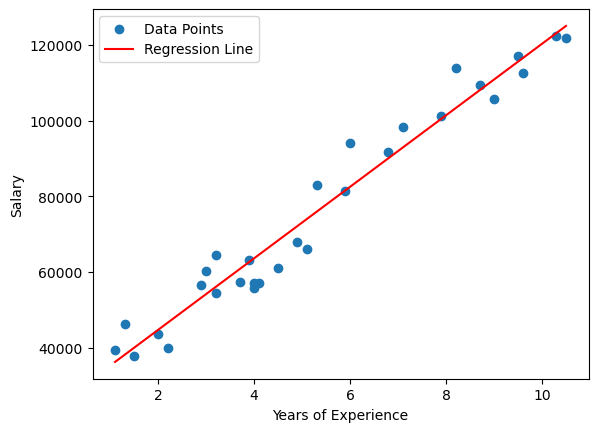

In [23]:
plt.scatter(x_train, y_train, label = "Data Points")

x_vals = np.linspace(min(x_train),max(x_train), 100)
y_vals = final_w * x_vals + final_b
plt.plot(x_vals, y_vals, color="red",label="Regression Line")

plt.xlabel("Years of Experience")
plt.ylabel("Salary")
plt.legend()
plt.show()